# Analyzing ATP and WTA Matches

In [0]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## ATP Grand Slam Matches

In [22]:
# list all atp_matches dfs from 1983 to 2019
matches_url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{}.csv"
list_of_matches_urls = [matches_url.format(year) for year in range(1983,2020)]
dfs_matches = [pd.read_csv(url) for url in list_of_matches_urls]
# concat all atp_matches from dfs 1983 to 2019
df_matches = pd.concat(dfs_matches, axis=0, sort=False, join='outer')
print(df_matches.shape)
df_matches.sample(5)

(120750, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
179,2008-580,Australian Open,Hard,NaN,G,20080114,25,103900,10.0,NaN,David Nalbandian,R,180.0,ARG,26.03,104635,NaN,WC,Robert Smeets,L,188.0,AUS,22.18,6-1 6-1 7-6(3),5,R128,102.0,4.0,5.0,75.0,39.0,32.0,24.0,13.0,1.0,2.0,6.0,5.0,87.0,38.0,24.0,20.0,13.0,3.0,9.0,10.0,1775.0,149.0,286.0
634,1995-807,Mexico City,Clay,NaN,A,19950227,25,101897,NaN,NaN,Fernando Meligeni,L,180.0,BRA,23.88,101783,NaN,NaN,Mark Petchey,R,183.0,GBR,24.57,3-6 6-2 7-6(3),3,QF,125.0,0.0,2.0,97.0,53.0,35.0,29.0,14.0,4.0,6.0,4.0,8.0,109.0,52.0,38.0,28.0,15.0,5.0,8.0,86.0,510.0,113.0,421.0
1409,2000-414,Hamburg Masters,Clay,NaN,M,20000515,1,101948,1.0,NaN,Pete Sampras,R,185.0,USA,28.76,102162,NaN,NaN,Chris Woodruff,R,188.0,USA,27.36,6-4 7-6(5),3,R64,98.0,6.0,8.0,70.0,32.0,25.0,21.0,11.0,2.0,4.0,7.0,1.0,74.0,44.0,32.0,14.0,11.0,4.0,7.0,2.0,3308.0,36.0,843.0
728,2007-433,Las Vegas,Hard,NaN,A,20070226,517,105023,NaN,WC,Sam Querrey,R,198.0,USA,19.39,102834,NaN,NaN,Paul Goldstein,R,178.0,USA,30.56,6-4 1-6 6-4,3,RR,79.0,16.0,6.0,81.0,45.0,29.0,18.0,14.0,1.0,6.0,0.0,1.0,72.0,49.0,28.0,15.0,13.0,0.0,4.0,77.0,502.0,76.0,504.0
2296,1999-421,Canada Masters,Hard,NaN,M,19990802,19,102148,NaN,NaN,Fabrice Santoro,R,178.0,FRA,26.64,101463,NaN,NaN,Bernd Karbacher,R,185.0,GER,31.33,6-2 7-5,3,R64,87.0,5.0,4.0,62.0,34.0,25.0,16.0,10.0,4.0,5.0,1.0,5.0,78.0,41.0,27.0,14.0,10.0,8.0,12.0,43.0,895.0,90.0,546.0


In [23]:
# only quarter finalists in  grand slams
atp_g = df_matches[df_matches['tourney_level']=='G']
# set year for dataframe
atp_g['t_year'] = atp_g.tourney_date//10000
# convert integer date to proper date format
atp_g['t_date'] = atp_g['tourney_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
print(atp_g.shape)
atp_g.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(18159, 51)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,t_year,t_date
1944,1998-540,Wimbledon,Grass,NaN,G,19980622,74,102259,NaN,NaN,Jerome Golmard,L,188.0,FRA,24.78,102765,NaN,NaN,Nicolas Escude,R,185.0,FRA,22.22,6-3 6-4 4-6 7-6(6),5,R64,156.0,6.0,7.0,151.0,99.0,75.0,22.0,21.0,7.0,9.0,12.0,12.0,168.0,91.0,74.0,30.0,20.0,8.0,11.0,86.0,612.0,35.0,1067.0,1998,1998-06-22
2472,2008-560,US Open,Hard,NaN,G,20080825,12,103908,24.0,NaN,Paul Henri Mathieu,R,185.0,FRA,26.62,103206,NaN,NaN,Sebastien Grosjean,R,175.0,FRA,30.24,6-7(4) 7-6(5) 6-3 6-2,5,R128,170.0,7.0,4.0,133.0,74.0,54.0,41.0,21.0,4.0,5.0,22.0,4.0,128.0,69.0,56.0,28.0,20.0,3.0,7.0,25.0,1095.0,70.0,586.0,2008,2008-08-25
1453,1988-520,Roland Garros,Clay,NaN,G,19880523,17,101138,4.0,NaN,Pat Cash,R,183.0,AUS,22.99,101131,NaN,NaN,Jimmy Brown,R,180.0,USA,23.07,6-3 6-1 6-1,5,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,133.0,NaN,1988,1988-05-23
1832,1989-540,Wimbledon,Grass,NaN,G,19890626,33,100581,5.0,NaN,John Mcenroe,L,180.0,USA,30.36,101190,NaN,NaN,Darren Cahill,R,185.0,AUS,23.73,4-6 4-6 6-2 6-3 8-6,5,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,26.0,NaN,1989,1989-06-26
1682,2010-540,Wimbledon,Grass,NaN,G,20100621,12,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,23.79,104527,20.0,NaN,Stanislas Wawrinka,R,183.0,SUI,25.23,6-7(5) 6-1 2-6 7-6(4) 6-3,5,R128,185.0,6.0,1.0,153.0,106.0,77.0,31.0,25.0,0.0,3.0,9.0,10.0,135.0,84.0,56.0,33.0,23.0,1.0,5.0,70.0,715.0,23.0,1690.0,2010,2010-06-21


In [24]:
# only quarter finalists
atp_g_qf = atp_g[atp_g['round']=='QF']
print(atp_g_qf.shape)
atp_g_qf.sample(5)

(576, 51)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,t_year,t_date
260,2014-580,Australian Open,Hard,NaN,G,20140113,122,103819,6.0,NaN,Roger Federer,R,185.0,SUI,32.43,104918,4.0,NaN,Andy Murray,R,190.0,GBR,26.67,6-3 6-4 6-7(6) 6-3,5,QF,200.0,10.0,0.0,122.0,78.0,60.0,29.0,21.0,1.0,2.0,9.0,1.0,146.0,89.0,60.0,28.0,19.0,13.0,17.0,6.0,4355.0,4.0,5560.0,2014,2014-01-13
1480,2015-520,Roland Garros,Clay,NaN,G,20150524,122,104918,3.0,NaN,Andy Murray,R,190.0,GBR,28.02,103970,7.0,NaN,David Ferrer,R,175.0,ESP,33.14,7-6(4) 6-2 5-7 6-1,5,QF,196.0,9.0,2.0,126.0,73.0,57.0,22.0,20.0,6.0,11.0,2.0,11.0,124.0,69.0,47.0,19.0,19.0,8.0,16.0,3.0,7040.0,8.0,4490.0,2015,2015-05-24
2835,1989-560,US Open,Hard,NaN,G,19890828,123,101381,14.0,NaN,Aaron Krickstein,R,183.0,USA,22.07,101309,11.0,NaN,Jay Berger,R,180.0,USA,22.75,3-6 6-4 6-2 1-0 RET,5,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,13.0,NaN,1989,1989-08-28
2071,1997-540,Wimbledon,Grass,NaN,G,19970623,121,101948,1.0,NaN,Pete Sampras,R,185.0,USA,25.86,101414,8.0,NaN,Boris Becker,R,190.0,GER,29.59,6-1 6-7(5) 6-1 6-4,5,QF,126.0,17.0,4.0,131.0,90.0,82.0,21.0,19.0,4.0,4.0,6.0,2.0,109.0,70.0,52.0,17.0,17.0,4.0,9.0,1.0,4743.0,18.0,1692.0,1997,1997-06-23
2433,2015-560,US Open,Hard,NaN,G,20150831,124,103819,2.0,NaN,Roger Federer,R,185.0,SUI,34.06,104755,12.0,NaN,Richard Gasquet,R,185.0,FRA,29.20,6-3 6-3 6-1,5,QF,NaN,16.0,2.0,70.0,53.0,46.0,8.0,13.0,0.0,0.0,1.0,2.0,73.0,44.0,27.0,12.0,12.0,8.0,13.0,2.0,9065.0,12.0,2240.0,2015,2015-08-31


In [0]:
# only finalists
atp_g_f = atp_g[atp_g['round']=='F']

# only matches Roger Federer as grand slam winner
df_rf = atp_g_f[(atp_g_f['winner_name']=='Roger Federer')]
# only matches for Rafael Nadal as grand slam winner
df_rn = atp_g_f[(atp_g_f['winner_name']=='Rafael Nadal')]
# only matches for Novak Djokovic as grand slam winner
df_nd = atp_g_f[(atp_g_f['winner_name']=='Novak Djokovic')]

In [31]:
# create age mean of grand slam quarterfinalists
age_data = []
for year in range(1983,2019):
  df_year = atp_g_qf[atp_g_qf['t_year']==year]
  age_mean_w = df_year.winner_age.mean()
  age_mean_l = df_year.loser_age.mean()
  age_mean = (age_mean_l+age_mean_w)/2
  age_data.append([df_year.iloc[-1]['t_date'], age_mean])
  
# create dataframe for average quarterfinalists' age
atp_age_qf = pd.DataFrame(age_data,columns=['date','age_mean'])
atp_age_qf

,date,age_mean
0,1983-11-29,24.876250
1,1984-11-26,24.047500
2,1985-11-25,24.947812
3,1986-08-26,23.665833
4,1987-09-01,25.323438
5,1988-08-29,23.954062
6,1989-08-28,24.792813
7,1990-08-27,24.217188
8,1991-08-26,24.271563
9,1992-08-31,24.198750


Text(1980-10-20 00:00:00, 11.5, 'GEORGE HOU                                                            SOURCE: TENNISABSTRACT.COM')

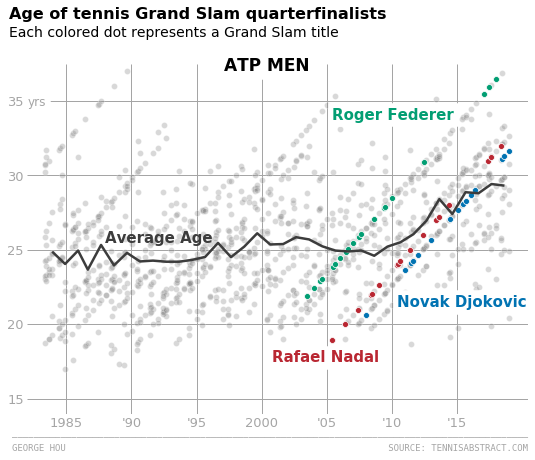

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
# set plot style
plt.style.use('fivethirtyeight')

# Adding the scout changes the xaxis relative to when we don't add the scout
scout = ax.scatter([], [])
scout.remove()

# despine outer frame
sns.despine(left=True, bottom=True)

# set background to white
plt.rcParams['figure.facecolor'] = 'white'
plt.grid(color='#A5A5A5')
ax.set(yticks=range(0, 40, 5), facecolor='white')

axw = sns.scatterplot(x="t_date", y="winner_age", alpha=.3,
                      data=atp_g_qf,color='grey')
axl = sns.scatterplot(x="t_date", y="loser_age", alpha=.3,
                      data=atp_g_qf,color='grey')
axw1 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_nd,color='#0173B2')
axw2 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_rn,color='#B92732')
axw3 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_rf,color='#029E73')

# average age mean line 34495E
ax.plot(atp_age_qf.date, atp_age_qf['age_mean'], color='#3C3C3C', lw=2.5)

# set x and y label
ax.set_xlabel('', fontsize=20, color='#A5A5A5')
ax.set_ylabel('', fontsize=20, color='#A5A5A5')

# modify y labels
ax.set_yticks([15, 20,25,30,35])
ax.set_yticklabels(labels=['15','20','25','30','35'], 
                   fontsize=13, color='#A5A5A5')

# modify x labels
ax.set_xticks([pd.to_datetime('1985-1-1'), pd.to_datetime('1990-1-1'), 
               pd.to_datetime('1995-1-1'), pd.to_datetime('2000-1-1'), 
               pd.to_datetime('2005-1-1'), pd.to_datetime('2010-1-1'), 
               pd.to_datetime('2015-1-1')])
ax.set_xticklabels(labels=["1985","'90","'95","2000","'05","'10","'15"], 
                   fontsize=13, color='#A5A5A5')

# set x and y limits
# ax.set_xlim([dt.date(1982, 6, 25), dt.date(2019, 2, 1)])
ax.set_xlim([pd.to_datetime('1982-1-1'), pd.to_datetime('2020-6-30')])
ax.set_ylim([14, 37.5])

# Text for Title Three Kings of Tennis still going strong
ax.text(x=pd.to_datetime('1980-8-1'), y=40.5, s="Age of tennis Grand Slam quarterfinalists", 
        fontsize=16, fontweight='bold');

# Text for Subtitle
ax.text(x=pd.to_datetime('1980-8-1'), y=39.3, s="Each colored dot represents a Grand Slam title", 
        fontsize=14);
# ax.text(x=pd.to_datetime('1980-8-1'), y=38.2, s="1983-2018", 
#         fontsize=14);

# text for yrs next to 40
ax.text(x=pd.to_datetime('1982-1-1'), y=34.65, s="yrs", fontsize=12, 
        color='#A5A5A5',backgroundcolor = 'white')

# text for Roger Federer
ax.text(x=pd.to_datetime('2005-5-20'), y=33.763, s="Roger Federer", fontsize=15, 
        color='#029E73', fontweight='semibold',backgroundcolor = 'white')

# text for Rafael Nadal
ax.text(x=pd.to_datetime('2000-10-25'), y=17.45, s="Rafael Nadal", fontsize=15, 
        color='#B92732', fontweight='semibold',backgroundcolor = 'white')

# text for Novak Djokovic
ax.text(x=pd.to_datetime('2010-5-20'), y=21.189, s="Novak Djokovic", fontsize=15, 
        color='#0173B2', fontweight='semibold',backgroundcolor = 'white')

# text for average age
ax.text(x=pd.to_datetime('1988-1-1'), y=25.5, s="Average Age", fontsize=15, 
        color='#3C3C3C', fontweight='semibold')

# text for Men
ax.text(x=pd.to_datetime('1997-2-1'), y=37, s="ATP MEN", fontsize=17, 
        color='black', fontweight='bold',backgroundcolor = 'white')

# signature line at bottom
ax.text(x =pd.to_datetime('1980-10-20'), y = 12.5,
    s = '________________________________________________________________________________________________',
    fontsize = 9, family='monospace', color = '#A5A5A5')
ax.text(x =pd.to_datetime('1980-10-20'), y = 11.5,
    s = 'GEORGE HOU                                                            SOURCE: TENNISABSTRACT.COM',
    fontsize = 9, family='monospace', color = '#A5A5A5')

